# Project: Cars Evaluation

Nowadays you cannot go anywhere without having car ride and sometimes you cannot use taxi or Uber to reach to your destiny so choosing the best car for your essential needs is extremely important.

In this project, I have analyzed data publicly available about Car Evaluation and was downloaded from the UC Irvine Machine Learning Repository, and dataset consists of 1728 rows and 7 columns.


In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# magic word for producing visualizations in notebook
%matplotlib inline

#to display more than one output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



### Step 1: Load the Data
#### 1. Business Understanding
#### 2. Data Understanding
#### 3. Prepare Data


In [2]:
#1) Pick a dataset.
# Load data.
car_data = pd.read_csv('car.csv',sep=",", header=None)
car_data.columns = ['buying', 'maint','doors','persons','lug_boot','safety','class']
   #CAR                      car acceptability
   #. PRICE                  overall price
   #. . buying               buying price
   #. . maint                price of the maintenance
   #. TECH                   technical characteristics
   #. . COMFORT              comfort
   #. . . doors              number of doors
   #. . . persons            capacity in terms of persons to carry
   #. . . lug_boot           the size of luggage boot
   #. . safety               estimated safety of the car
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car_data.describe()
car_data.info()


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,med,high,unacc
freq,432,432,432,576,576,576,1210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


2) Pose at least three questions related to business or real-world applications of how the data could be used.
#is the very good car expensive?
#is the safety will be high on the expensive the cars only?
#is the price of cars affect the price of maintenance?


### Step 2: Assess Missing Data

In [4]:
car_data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Step 3: Re-Encode Categorical Features

In [5]:
for col in car_data.columns:
    car_data[col].value_counts()

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64

high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64

2        432
5more    432
4        432
3        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64

med      576
small    576
big      576
Name: lug_boot, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [6]:
#https://pbpython.com/categorical-encoding.html
#Handle categorical and missing data

re_encode = {"buying": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
               "maint": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
                 "doors": {"5more": 5},
                    "persons": {"more": 5},
                       "lug_boot": {"big": 3, "small": 2, "med": 1},
                           "safety": {"high": 3, "med": 2, "low": 1},
                              "class": {"vgood": 4, "good": 3, "acc": 2, "unacc": 1}}

#### Provide insight into the methods you chose and why you chose them:
- To encoding the categorical data, the approach that I have used is I  find and replace because the categorical levels is between 2 and 4 and they are easily translated to numbers, also I want to know each number assign to any categorical.

In [7]:
car_data.replace(re_encode, inplace=True)
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,2,1,1
1,4,4,2,2,2,2,1
2,4,4,2,2,2,3,1
3,4,4,2,2,1,1,1
4,4,4,2,2,1,2,1


In [8]:
car_data.describe()
car_data.info()



,buying,maint,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.000000,2.000000,1.414931
std,1.118358,1.118358,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,3.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [9]:
car_data['doors'] = car_data['doors'].astype(int)
car_data['persons'] = car_data['persons'].astype(int)

In [10]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int32
persons     1728 non-null int32
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int32(2), int64(5)
memory usage: 81.1 KB


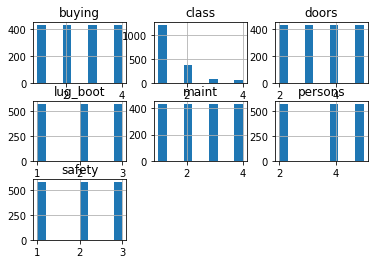

In [11]:
car_data.hist();

#### here is Analyze, Model, and Visualize
here is I decide to divide the data to 4 so that it will help me to answer my questions. 


In [12]:
#"class": {"vgood": 4, "good": 3, "acc": 2, "unacc": 1}}

vgood=car_data[car_data['class'] == 4]
good=car_data[car_data['class'] == 3]
acc=car_data[car_data['class'] == 2] 
unacc=car_data[car_data['class'] == 1] 

vgood.shape[0]
good.shape[0]
acc.shape[0]
unacc.shape[0]


65

69

384

1210

In [13]:

#"buying": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
#"maint": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
#"safety": {"high": 3, "med": 2, "low": 1},
def bars(data):
    """
Description: This function can be used to read data to get a bar chart of specific columns.

Arguments:
    data: data variable. 

Returns:
    three bar charts for buying, maint and safety.
"""
    fig, ax =plt.subplots(1,3)
    (data.buying.value_counts()).plot(kind="bar",ax=ax[0]).set_title("buying")
    (data.maint.value_counts()).plot(kind="bar",ax=ax[1]).set_title("maint")
    (data.safety.value_counts()).plot(kind="bar",ax=ax[2]).set_title("safety")
    fig.show()


C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


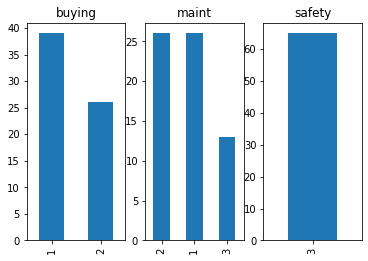

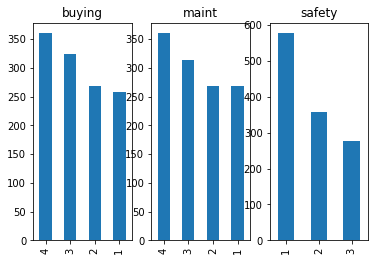

In [14]:
bars(vgood)
bars(unacc)

C:\Users\Fatim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


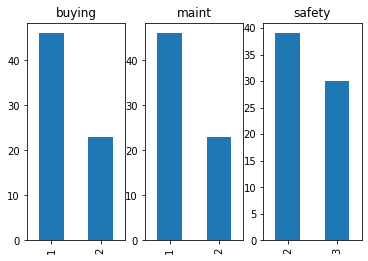

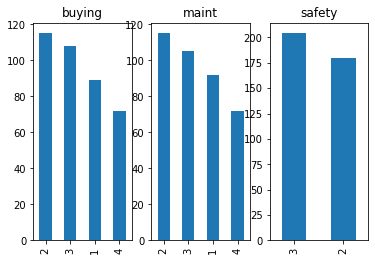

In [15]:
bars(good)
bars(acc)

#### Provide a clear connection between your business questions and how the data answers them:
#### 1- is the very good car expensive?
#### 2- is the safety will be high on the expensive the cars only?
#### 3- is the price of cars affect the price of maintenance?
- at the first, I thought that cars with high price mean high safety, but based on the data the cars with a high price most of them are evaluate Unacceptability and the safety is low, and very good cars are low in prices with high safety.

### Step 4: Build  the model

In [16]:
#define variables(features,prices)
X=car_data.iloc[:,:-1]
y=car_data.iloc[:,-1]

In [17]:
#split the data to two sets. training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#### 4. Data Modeling
#### 5. Evaluate the Results

In [18]:
#model
RandomForest = RandomForestClassifier(random_state=1)
model=RandomForest.fit(X_train, y_train) 
predict = model.predict(X_test)

#Accuracy
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predict)))



Accuracy score on testing data: 0.9326


C:\Users\Fatim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
def feature_plot(importances, X_train, y_train):
    """
Description: This function can be used to read train data to get a bar chart of specific columns.

Arguments:
    importances: importint feature. 
    X_train: features
    y_train: calss
Returns:
the bar chart has the important features that help the model to predict

"""
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


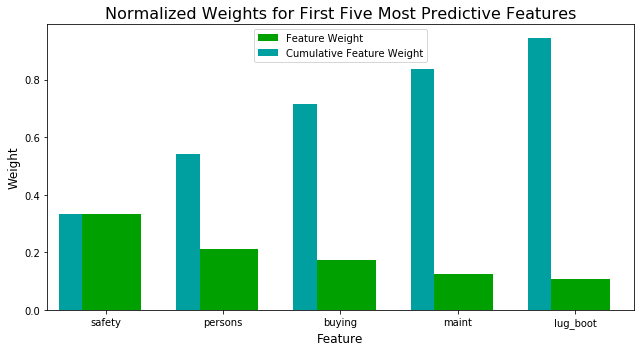

In [20]:
impo=model.feature_importances_
feature_plot(impo, X_train, y_train)